In [1]:

import geopandas as gpd
import fiona

# Define the path to the File Geodatabase
gdb_path = r"C:\Users\nilsdi\OneDrive - NTNU\Personal_Python\demolition_footprints\data\raw\FKB_bygning\Basisdata_5001_Trondheim_5972_FKB-Bygning_FGDB.gdb"

# List all layers in the File Geodatabase
layers = fiona.listlayers(gdb_path)

# Print the layers
for layer in layers:
    print(layer)

# Read a layer from the File Geodatabase
gdf_grenser = gpd.read_file(gdb_path, driver='FileGDB', layer='fkb_bygning_grense')
gdf_omrade = gpd.read_file(gdb_path, driver='FileGDB', layer='fkb_bygning_omrade')

# Print the GeoDataFrame
print(gdf_omrade.head())

fkb_bygning_omrade
fkb_bygning_posisjon
fkb_bygning_grense
fkb_bygning_senterlinje
        objtype                               lokalid  \
0  AnnenBygning  e09a4865-16cc-49a5-bc4a-000547bcbd45   
1  AnnenBygning  2ec73779-32ce-409e-8d0e-0005c4034ce7   
2  AnnenBygning  4f99fd11-088d-497a-ac0a-000f3238b92f   
3  AnnenBygning  a1d136be-d0fd-458a-909e-0010bb5826e9   
4  AnnenBygning  e9ebeb35-1420-49bf-8b9e-001e0ef64bf1   

             datafangstdato         verifiseringsdato  \
0 2008-05-10 00:00:00+00:00 2021-08-10 00:00:00+00:00   
1 2007-05-30 00:00:00+00:00 2021-08-12 00:00:00+00:00   
2 2019-06-06 00:00:00+00:00 2021-08-10 00:00:00+00:00   
3 2007-05-30 00:00:00+00:00 2021-08-12 00:00:00+00:00   
4 2021-08-12 00:00:00+00:00                       NaT   

           oppdateringsdato informasjon sluttdato registreringsversjon  \
0 2023-05-03 16:26:54+00:00        None       NaT           2020-01-01   
1 2023-05-03 16:26:54+00:00        None       NaT           2007-01-01   
2 2023-05

In [10]:
# I want to draw a random 12 buildings from the dataset
n = 12
# setting the seed for reproducibility
seed = 42
gdf_sample = gdf_omrade.sample(n=n, random_state=seed)
# reset the index
gdf_sample.reset_index(drop=True, inplace=True)

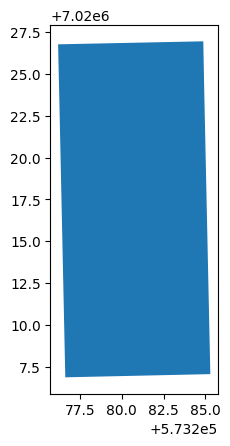

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'geometry' is a MultiPolygon
multipolygon = gdf_sample.loc[0]['geometry']

# Create a GeoSeries
geoseries = gpd.GeoSeries([multipolygon])

# Plot the GeoSeries
geoseries.plot()

# Show the plot
plt.show()

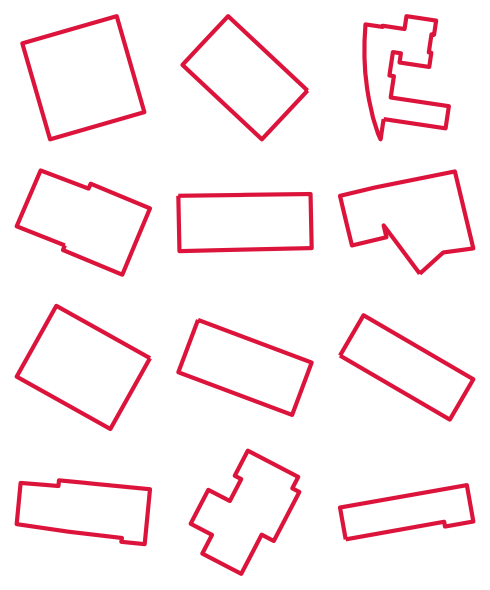

In [32]:
# I know want to plot those buildings in a 4x3 grid, with the buildings in the center of their cell in the grid
import matplotlib.pyplot as plt
import numpy as np
# I want to draw a random 12 buildings from the dataset
n = 12
# setting the seed for reproducibility
seed = 41
gdf_sample = gdf_omrade.sample(n=n, random_state=seed)
# reset the index
gdf_sample.reset_index(drop=True, inplace=True)

# Define the number of rows and columns
nrows = 4
ncols = 3

# Create a figure and axis
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5, 6))
# Iterate over each subplot
for i in range(nrows):
    for j in range(ncols):
        # Get the index of the current GeoDataFrame
        idx = i * ncols + j
        
        # Check if the index is within the range of available GeoDataFrames
        if idx < len(gdf_sample):
            # Plot the GeoDataFrame
            #gdf_sample.loc[idx].plot(ax=axs[i, j])
            # Assuming 'geometry' is a MultiPolygon
            multipolygon = gdf_sample.loc[idx]['geometry']

            # Create a GeoSeries
            geoseries = gpd.GeoSeries([multipolygon])

            # Plot the GeoSeries
            geoseries.plot(facecolor = 'none', edgecolor = 'crimson', linewidth = 3, ax = axs[i, j])
            # Turn off the axis for this subplot
            axs[i, j].axis('off')
            
            # Optionally, set the title
            #axs[i, j].set_title(f'Building {idx + 1}')
        else:
            # If there's no GeoDataFrame for this subplot, remove the axis
            fig.delaxes(axs[i,j])

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()
plt.axis('off')
plt.show()
